# Case Study - We are going to analyse the data of monthly beer production of Australia in the $20^{th}$ century.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 8]

import warnings
warnings.filterwarnings("ignore")

### Python allows us to read the data from a '.csv' file into a Time Series object in various ways. We are going to look at two ways to load Time Series data.

### Method 1:

In [2]:
df_1 = pd.read_csv("Sparkling.csv",parse_dates=True,squeeze=True,index_col=0)

In [3]:
df_1.head()

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64

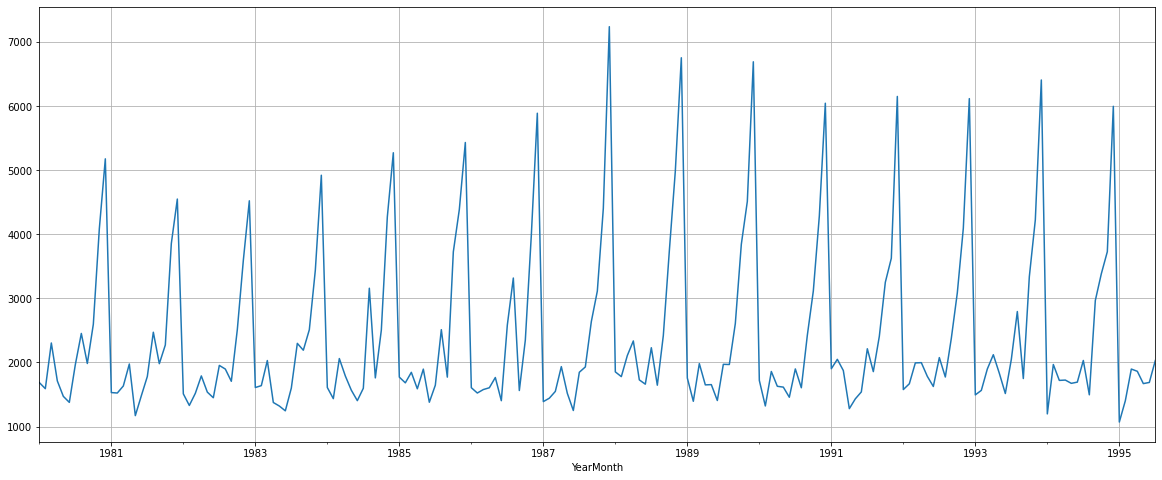

In [4]:
df_1.plot();
plt.grid()

### Method 2:

In [6]:
df_2 = pd.read_csv("Sparkling.csv")

In [7]:
df_2.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [11]:
df_2.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


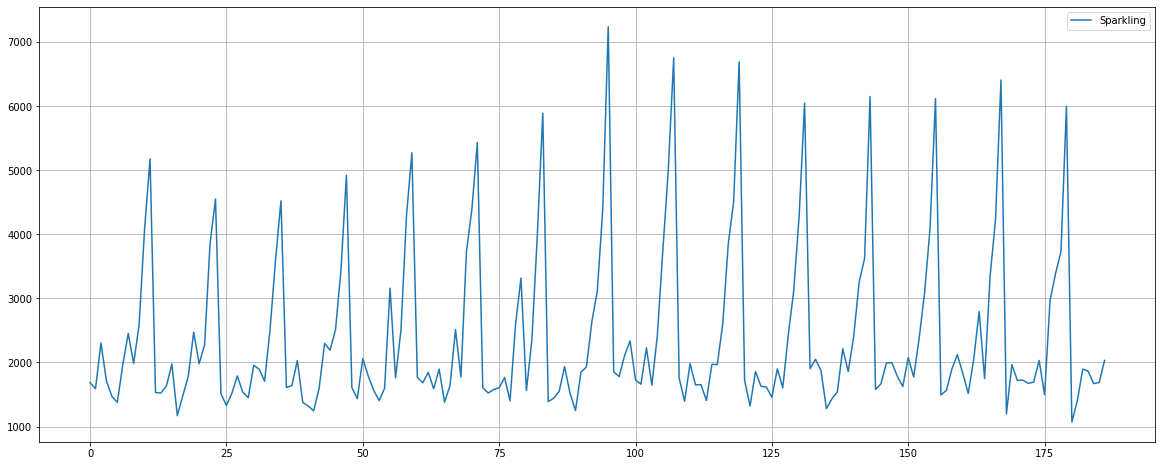

In [8]:
df_2.plot();
plt.grid()

Though the above plot looks like a Time Series plot, notice that the X-Axis is not time. In order to make the X-Axis as a Time Series, we need to pass the date range manually through a command in Pandas.

In [12]:
date = pd.date_range(start='1/1/1980', end='1/7/1995', freq='M')

The time stamps (in the above code snippet) is defined as a monthly Time Series after looking at the data. Please refer to the following documentation of the 'date_range' functionality in Pandas from $\href{https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html}{here}$.

In [13]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-03-31', '1994-04-30', '1994-05-31', '1994-06-30',
               '1994-07-31', '1994-08-31', '1994-09-30', '1994-10-31',
               '1994-11-30', '1994-12-31'],
              dtype='datetime64[ns]', length=180, freq='M')

In [14]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [15]:
df_2.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_2.head()

,YearMonth,Sparkling
Time_Stamp,,
1980-01-31,1980-01,1686
1980-02-29,1980-02,1591
1980-03-31,1980-03,2304
1980-04-30,1980-04,1712
1980-05-31,1980-05,1471


In [17]:
df_2.drop(labels='YearMonth',inplace=True,axis=1)
df_2.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [19]:
df_2['Sparkling']

Time_Stamp
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
              ... 
NaT           1897
NaT           1862
NaT           1670
NaT           1688
NaT           2031
Name: Sparkling, Length: 187, dtype: int64

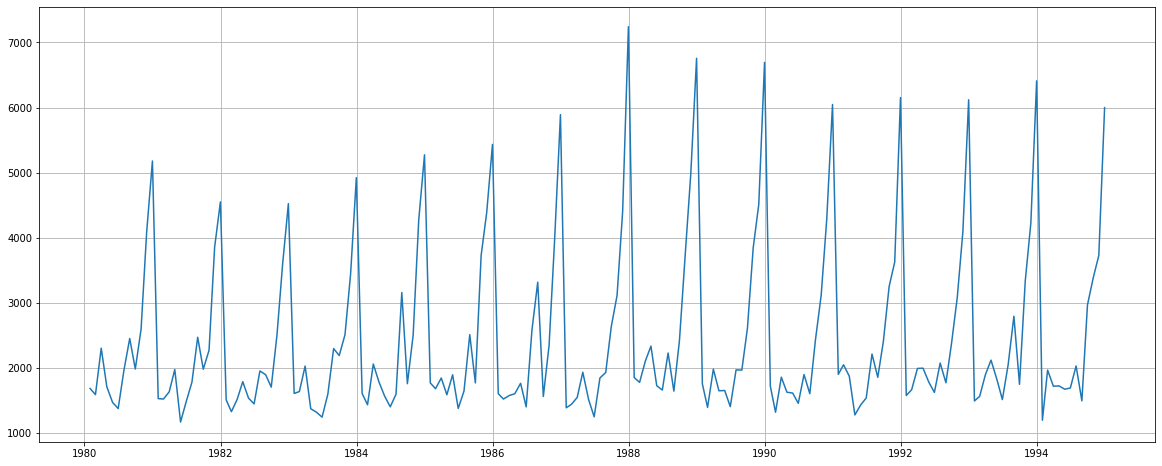

In [20]:
plt.plot(df_2);
plt.grid()

Now that we have seen how to load the data from a '.csv' file as a Time Series object, let us go ahead and analyse the Time Series plot that we got.

We notice that there is an increasing trend in the initial years which stabilizes as the years (or more specifically the months in each of the years) progresses. There is some kind of seasonality in the data as well.

# Find the mean and median of the monthly beer production.

In [21]:
df_1.describe()

count     187.000000
mean     2402.417112
std      1295.111540
min      1070.000000
25%      1605.000000
50%      1874.000000
75%      2549.000000
max      7242.000000
Name: Sparkling, dtype: float64

# Get all the observations for all months for the year 1956.

The following is the code snippet to get all the particular observations from a particular year of interest.

In [22]:
df_1['1956']

KeyError: '1956'

# Plot a year on year boxplot for the beer production.

Now, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers in each year, if any.

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.year, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Beer Production Variation');

As we got to know from the Time Series plot, the boxplots over here also indicates a measure of trend being present. Also, we see that the production of beer has some outliers for certain years.

# Plot a monthly boxplot for the beer production taking all the years into account.

Since this is a monthly data, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers for every month across all the years, if any.

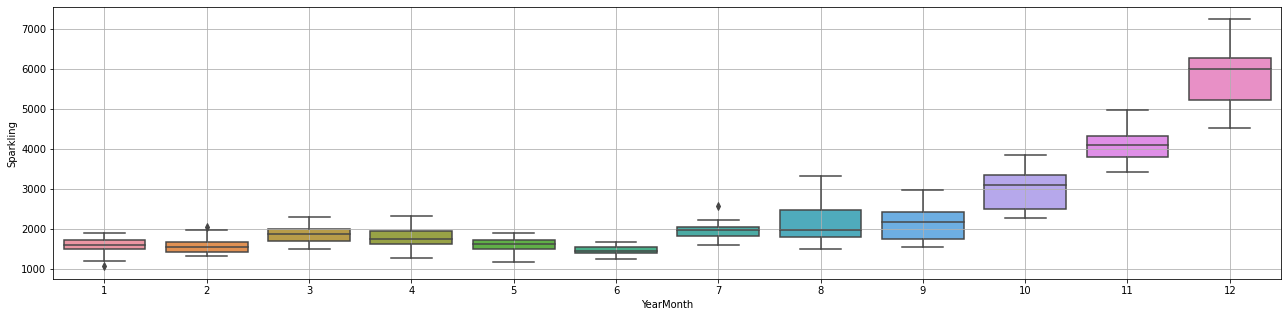

In [23]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df_1.index.month, df_1, ax=ax,whis=1.5)
plt.grid();

The boxplots for the monthly production for different years does not show any outliers.

# Plot a monthplot of the give Time Series.

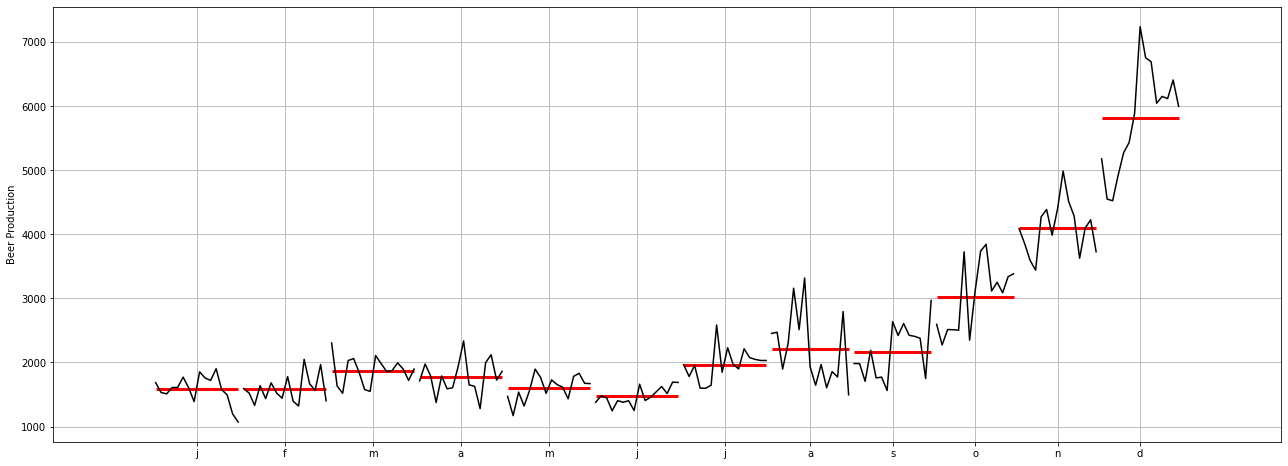

In [24]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='Beer Production',ax=ax)
plt.grid();

# Plot the Time Series according to different months for different years.

In [27]:
yearly_sales_across_months = pd.pivot_table(df_2, values = 'Sparkling', columns = df_2.index.month, 
                                        index = df_2.index.year)

yearly_sales_across_months

Time_Stamp,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Time_Stamp,,,,,,,,,,,,
1980.0,1686,1591,2304,1712,1471,1377,1966,2453,1984,2596,4087,5179
1981.0,1530,1523,1633,1976,1170,1480,1781,2472,1981,2273,3857,4551
1982.0,1510,1329,1518,1790,1537,1449,1954,1897,1706,2514,3593,4524
1983.0,1609,1638,2030,1375,1320,1245,1600,2298,2191,2511,3440,4923
1984.0,1609,1435,2061,1789,1567,1404,1597,3159,1759,2504,4273,5274
1985.0,1771,1682,1846,1589,1896,1379,1645,2512,1771,3727,4388,5434
1986.0,1606,1523,1577,1605,1765,1403,2584,3318,1562,2349,3987,5891
1987.0,1389,1442,1548,1935,1518,1250,1847,1930,2638,3114,4405,7242
1988.0,1853,1779,2108,2336,1728,1661,2230,1645,2421,3740,4988,6757


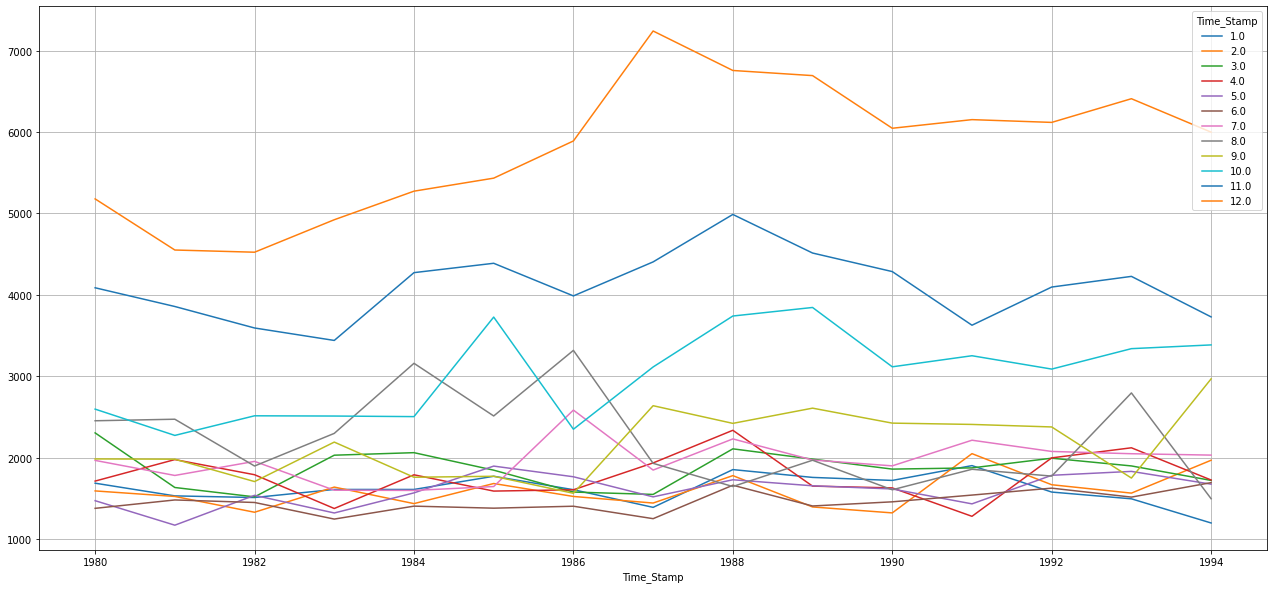

In [28]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

# Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.

### The concept of resampling will be covered in the video lectures of Second Week as well.

### Yearly Plot

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [29]:
df_yearly_sum = df_1.resample('A').sum()
df_yearly_sum.head()

YearMonth
1980-12-31    28406
1981-12-31    26227
1982-12-31    25321
1983-12-31    26180
1984-12-31    28431
Freq: A-DEC, Name: Sparkling, dtype: int64

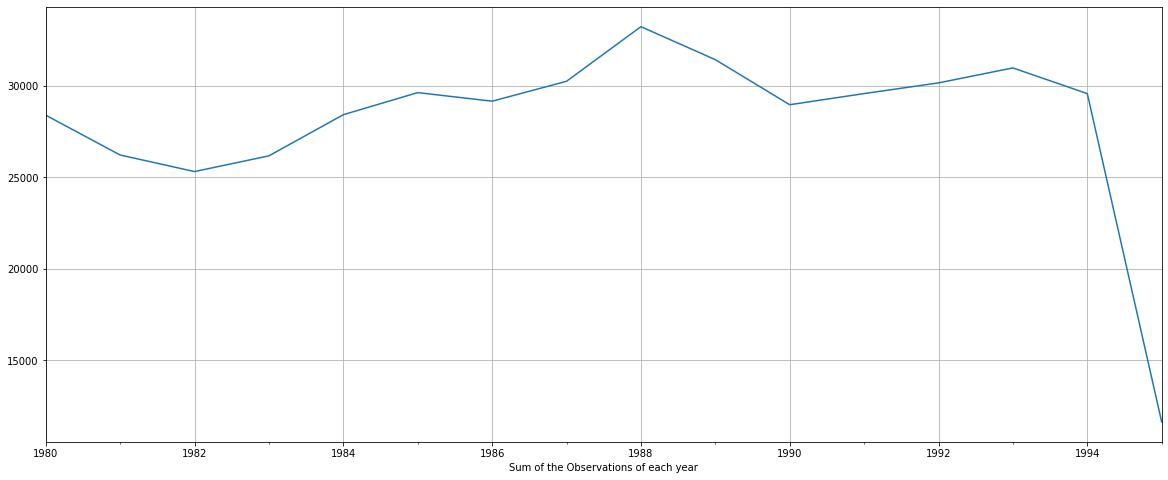

In [30]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

The resampled yearly or annual series have smoothened out the seasonality and have only been able to capture the year on year trend where there was.

### Quarterly Plot

In [31]:
df_quarterly_mean = df_1.resample('Q').mean()
df_quarterly_mean.head()

YearMonth
1980-03-31    1860.333333
1980-06-30    1520.000000
1980-09-30    2134.333333
1980-12-31    3954.000000
1981-03-31    1562.000000
Freq: Q-DEC, Name: Sparkling, dtype: float64

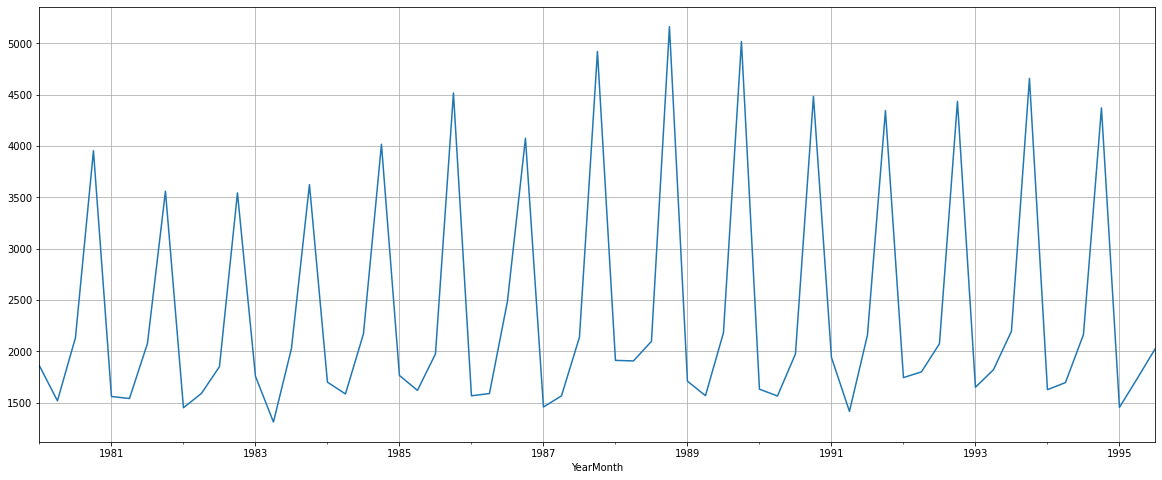

In [32]:
df_quarterly_mean.plot();
plt.grid()

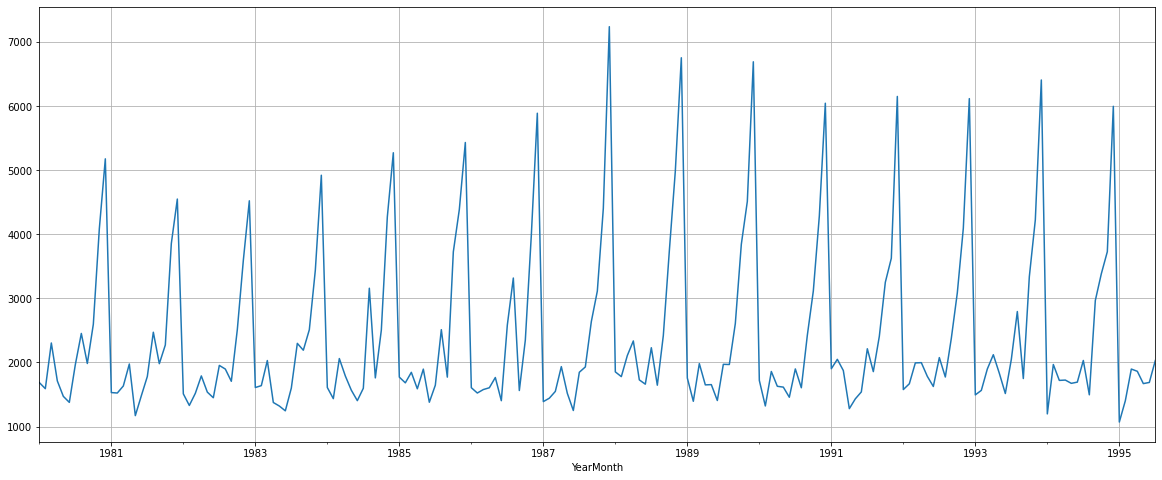

In [33]:
df_1.plot()
plt.grid();

We see that the year on year quarterly series represents the year on year monthly series. The quarterly series is able to catch the seasonality in the data.

### Daily Plot

Now, let us try to understand the data from a daily perspective.

In [34]:
df_daily_sum = df_1.resample('D').sum()
df_daily_sum

YearMonth
1980-01-01    1686
1980-01-02       0
1980-01-03       0
1980-01-04       0
1980-01-05       0
              ... 
1995-06-27       0
1995-06-28       0
1995-06-29       0
1995-06-30       0
1995-07-01    2031
Freq: D, Name: Sparkling, Length: 5661, dtype: int64

The values which the original series cannot provide is taken as 0 by python if we try to resample the data on a daily basis.

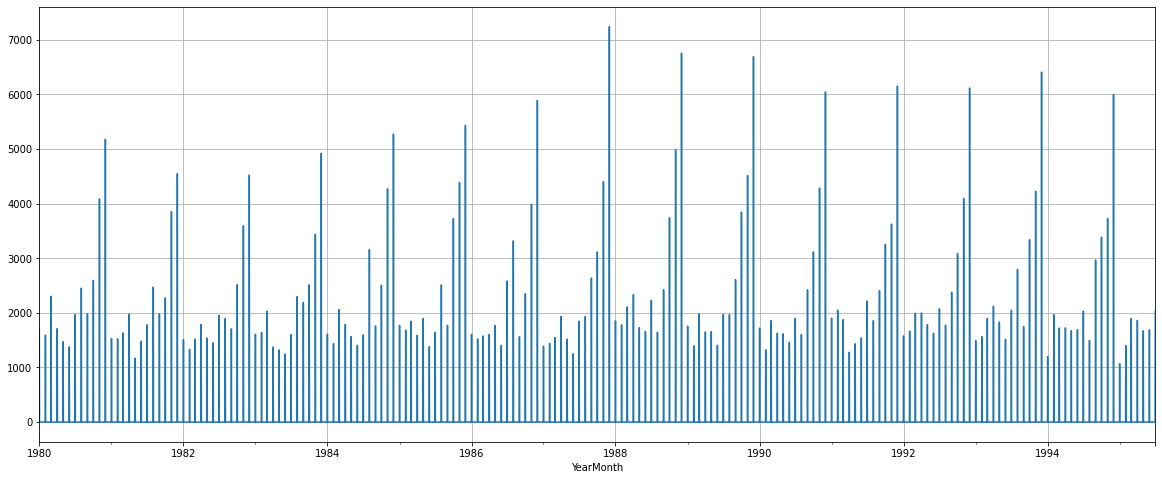

In [35]:
df_daily_sum.plot()
plt.grid();

The above graph fails to give us a proper understanding of our data. Thus, resampling the data to intervals where a number of observations are 0 is not a good idea as that does not give us an understanding of the performance of the time series.

To get a very high-level overview of the trend of the Time Series Data (if Trend is present) can be understood by resampling the data keeping the intervals very large.

# Decompose the Time Series

### Additive Model

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

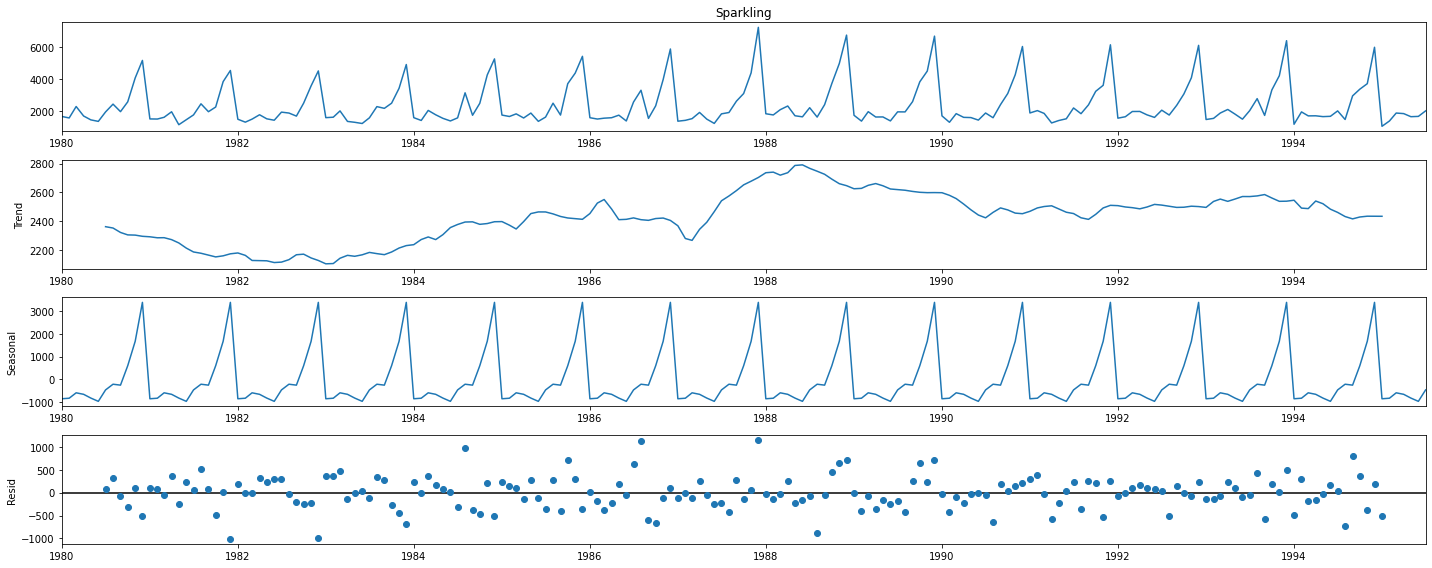

In [37]:
decomposition = seasonal_decompose(df_1,model='additive')
decomposition.plot();

As per the 'additive' decomposition, we see that there is a pronounced trend in the earlier years of the data. There is a seasonality as well.

In [38]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [39]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


In [40]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2431.502265
1980-08-01    2667.332821
1980-09-01    2238.677265
1980-10-01    1996.230043
1980-11-01    2411.932821
1980-12-01    1792.016154
dtype: float64

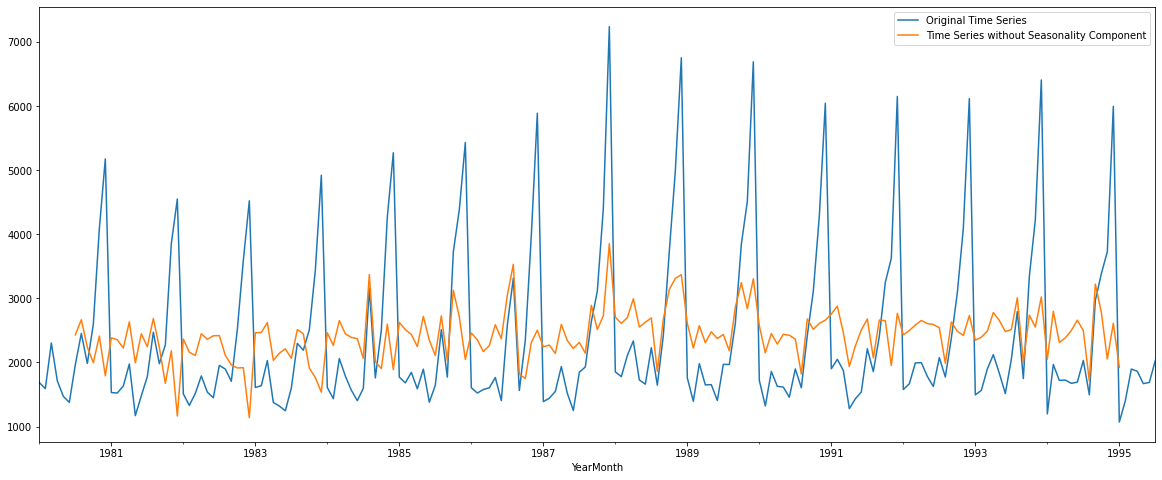

In [41]:
df_1.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [44]:
train    =   df_1[df_1.index.year < 1991] 
test     =   df_1[df_1.index.year >= 1991]

In [45]:
print(train.shape)
print(test.shape)

(132,)
(55,)


YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64

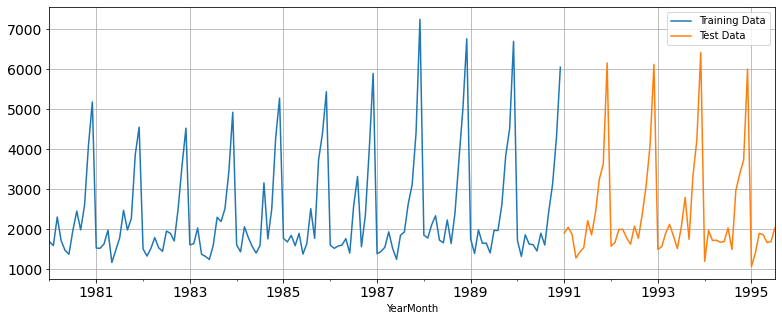

In [50]:
train.plot(figsize=(13,5), fontsize=14)
test.plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [51]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]
